This file pre-processes and analyses the dataset by calling the data.py file

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import data as da

### 1. read datasat
useing data.py file to read dataset.

In [9]:
data_pro=da.Data()

# 1.data
# 1.1 read data
data=data_pro.read_data()

### 2 data analysis
#### 2.1 check dataset
Retrieve data set information and check missing value.

In [10]:
# 1.2 data analysis
# 1.2.1 check dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There is no missing value in dataset. <br/>
#### 2.2 histogram of figure
The plt and sns package are called to output each feature as a <b>histogram</b> and a kernel density estimation (KDE) fitted curve to analyse the value of each feature and its distribution.

Histogram of raw data


D:\Anaconda\envs\machine\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\machine\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\envs\machine\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

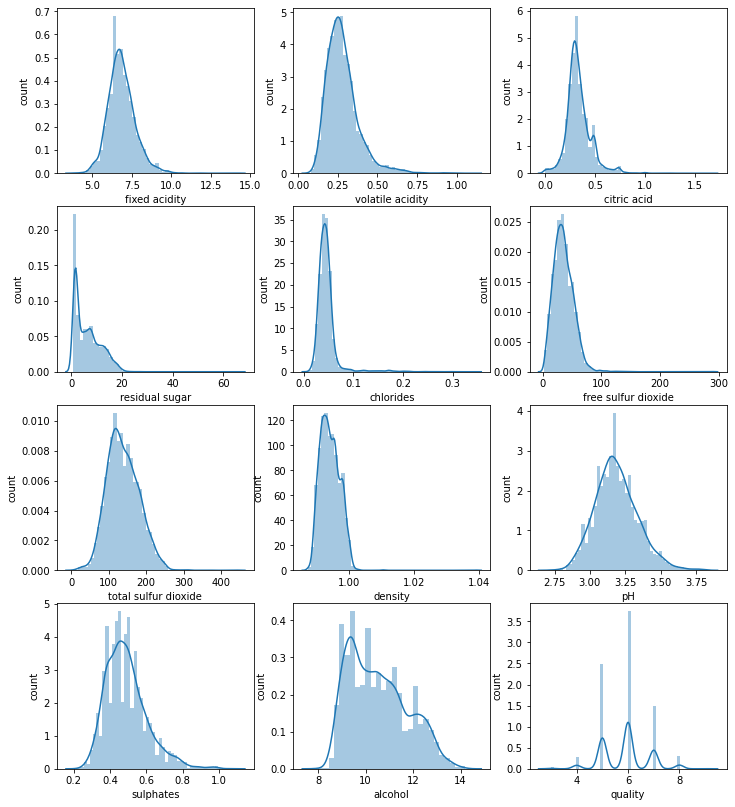

In [11]:
# 1.2.2 histogram
print('Histogram of raw data')
fig= plt.figure(figsize=[12,14])
for i in range(data.shape[1]):  # Column cycling
    # Arrange the 4*3 subplots, filling each one in turn
    plt.subplot(4,3,i+1)
    sns.distplot(data.iloc[:,i])
    plt.ylabel('count')

### <b>add analysis of Histogram</b>

#### 2.3 box plot
import plt and sns library to plot <b>box plots</b> and analyse the distribution of different independent variables in the values of the dependent variable (wine quality)

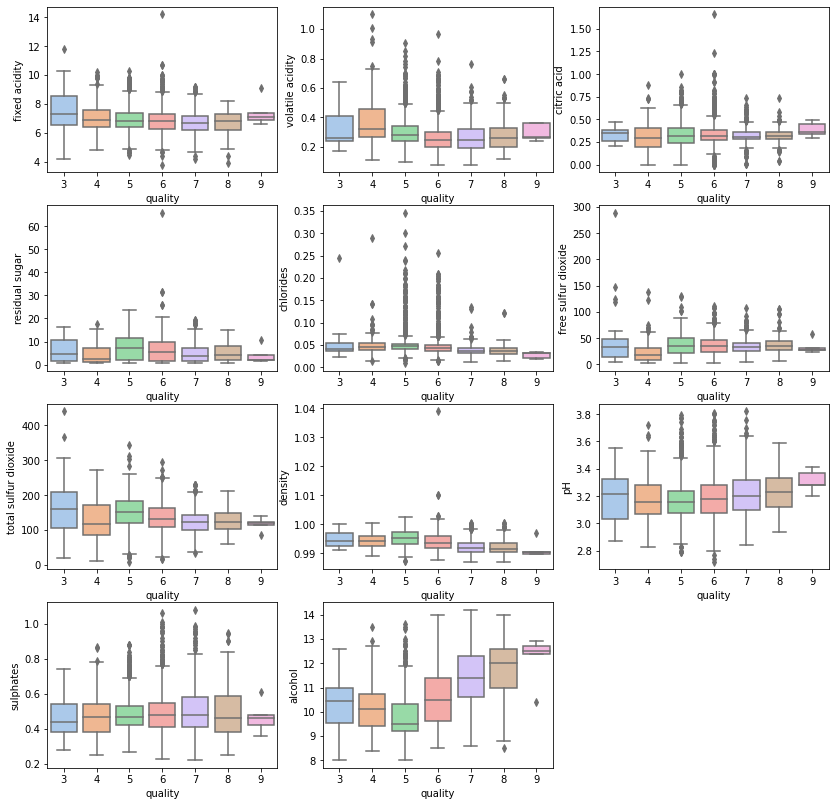

In [12]:
# 1.2.3 box plots
fig= plt.figure(figsize=[14,14])
for i in range(data.shape[1]-1):
    plt.subplot(4,3,i+1)
    # Set horizontal and vertical coordinates and display colours
    sns.boxplot(x=data['quality'],y=data.iloc[:,i],palette='pastel')

### <b>add analysis of Histogram</b>
别忘了分析下噪声点，（那些极值）

#### 2.4 corralation of feature
Calculate the correlation coefficients between the parameters and plot a heat map of the correlation coefficients of the variables

<AxesSubplot:>

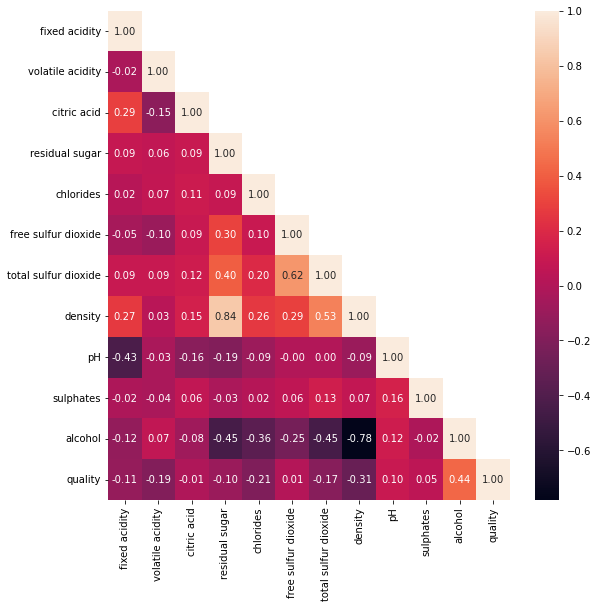

In [13]:
# 1.2.4 corralation
data_cor=data.corr() # get corralation value
# Convert to upper triangular matrix
data_cor_up=np.triu(data_cor,1)

fig,ax=plt.subplots(figsize=(9,9))
# 写完报告删掉这行，annot:显示数字，fmt显示两位小数,mask用上三角矩阵覆盖,center：colorbar在0分界
sns.heatmap(data_cor,mask=data_cor_up,annot=True,fmt='.2f')

### <b>add analysis of heatmap</b>

（描述并修改成正式文本）从箱型图可以看到噪音点的情况，特别是。。。还是挺多的，因此要进行噪音处理（我在瞎比比，我也不知道是不是这样说）
分析可以参考 https://www.enjoyalgorithms.com/blog/wine-quality-prediction 

### 3 data processing
#### 3.1 split dataset
split dataset  into 11 sets of independent variables and 1 set of dependent variables (quality)

In [14]:
# 1.3 data processing
# 1.3.1 split dataset
# (1) x and y
xs, ys = data_pro.split_x_y(data)

print(ys)

[6. 6. 6. ... 6. 7. 6.]


Slice the dataset into training data and testing data, and print the data shape

In [15]:
# (2) saparate training and testing data and random and normalization
# train: 80%; test:20%
xs, xs_train, xs_test, ys_train, ys_test=data_pro.data_processing(xs,ys)

print('training set shape:\t', xs_train.shape)
print('test set shape:\t\t', xs_test.shape)

training set shape:	 (3918, 11)
test set shape:		 (980, 11)


### 3.2 noisy processing
As analysed in the box plot above, noise points are evident in parts of the dataset and noise reduction is required.Referring to the following website description, it is believed that Principal Component Analysis (PCA) can achieve noise reduction in the dataset. Here we use sklearn's PCA function to process the dataset by first dimension reduction and then dimension raising.<br/>
The dataset without normalisation is first analysed and box plots are plotted for comparison with the previous section, and then the dataset after normalisation is analysed<br/><br/>
https://blog.csdn.net/qq_37334135/article/details/87026462 <br/>
https://www.cnblogs.com/volcao/p/9261228.html

[0.91  0.989 0.999 1.    1.    1.    1.    1.    1.    1.    1.   ]


Text(0, 0.5, 'explained ratio')

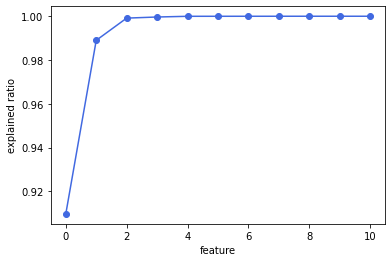

In [16]:
# 1.3.2 noisy processing（PCA)
from sklearn.decomposition import PCA

# (1) for dataset does not normalize
# 1) Find a pca relationship
pca=PCA()
pca.fit(xs)

pca_rate=np.cumsum(pca.explained_variance_ratio_)
print(np.around(pca_rate,3))

# plot figure
plt.plot(pca_rate,'royalblue')
plt.plot(pca_rate,'o',color='royalblue')
plt.xlabel('feature')
plt.ylabel('explained ratio')

for data set does not normalize The first 3 features explain 99.9% of the dependent variable, which needs to be reduced to 3 dimensions

In [18]:
# (2) Descending and then ascending
xs_trans, xs_pca = data_pro.data_noise(3,xs)

print('descending:\t', xs_trans.shape)
print('ascending:\t', xs_pca.shape)

descending:	 (4898, 3)
ascending:	 (4898, 11)


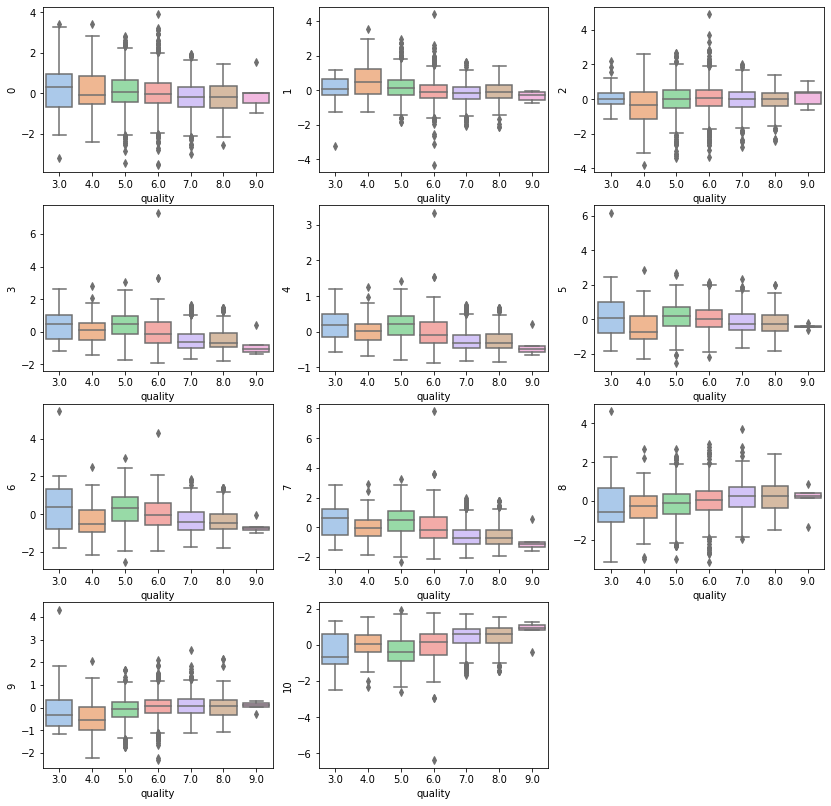

In [8]:
# (3) Figure after noise treatment
xs_pca_pd=pd.DataFrame(xs_pca)
data_col=list(data)

fig= plt.figure(figsize=[14,14])
for i in range(xs_pca.shape[1]):
    plt.subplot(4, 3, i+1, xlabel='quality', ylabel=str(data_col[i]))
    # Set horizontal and vertical coordinates and display colours
    sns.boxplot(x=ys,y=xs_pca_pd[i],palette='pastel')


[0.295 0.44  0.55  0.641 0.729 0.813 0.879 0.934 0.972 0.998 1.   ]


Text(0, 0.5, 'explained ratio')

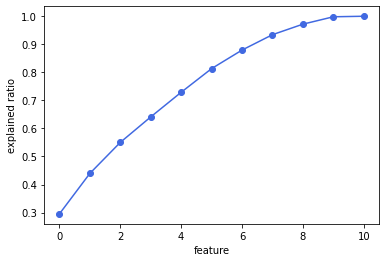

In [17]:
# (2) normalized dataset to proces noise
xs, xs_train, xs_test, ys_train, ys_test=data_pro.data_processing(xs,ys,True)

pca=PCA()
pca.fit(xs)

pca_rate=np.cumsum(pca.explained_variance_ratio_)
print(np.around(pca_rate,3))

# plot figure
plt.plot(pca_rate,'royalblue')
plt.plot(pca_rate,'o',color='royalblue')
plt.xlabel('feature')
plt.ylabel('explained ratio')

for data set which is normalized the first 10 features explain 99.9% of the dependent variable and need to be reduced to 3 dimensions